In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = df.iloc[:,3:13].values

In [5]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
y = df.iloc[:,13].values

In [7]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [8]:
from sklearn.preprocessing import Imputer

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
labelencoder_X_1 = LabelEncoder()

In [11]:
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])

In [12]:
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [13]:
labelencoder_X_2 = LabelEncoder()

In [14]:
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])

In [15]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [16]:
onehotencoder = OneHotEncoder(categorical_features = [1])

In [17]:
X = onehotencoder.fit_transform(X).toarray()

In [18]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [19]:
X = X[:,1:]

In [20]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [24]:
#_init_ ANN

In [25]:
classifier = Sequential()

In [26]:
classifier.add(Dense(units=15,kernel_initializer='uniform',activation='relu',input_dim = 11))

In [27]:
classifier.add(Dense(units=15,kernel_initializer='uniform',activation='relu'))

In [28]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [29]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
classifier.fit(X_train,y_train,batch_size=10,epochs= 100)

Epoch 1/100
8000/8000 [==============================] - 1s 88us/step - loss: 0.4649 - acc: 0.7954
Epoch 2/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.4222 - acc: 0.8079
Epoch 3/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.4124 - acc: 0.8341
Epoch 4/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.4077 - acc: 0.8334
Epoch 5/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.4040 - acc: 0.8362
Epoch 6/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.4021 - acc: 0.8332
Epoch 7/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.4006 - acc: 0.8349
Epoch 8/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.3993 - acc: 0.8346
Epoch 9/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3982 - acc: 0.8351
Epoch 10/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.3977 - acc: 0.8366
Epoch 11/

8000/8000 [==============================] - 0s 51us/step - loss: 0.3288 - acc: 0.8645
Epoch 84/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.3273 - acc: 0.8651
Epoch 85/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.3282 - acc: 0.8664
Epoch 86/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3276 - acc: 0.8659
Epoch 87/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.3261 - acc: 0.8650
Epoch 88/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.3269 - acc: 0.8660
Epoch 89/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.3286 - acc: 0.8635
Epoch 90/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.3277 - acc: 0.8654
Epoch 91/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3289 - acc: 0.8656
Epoch 92/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.3277 - acc: 0.8640
Epoch 93/100


In [31]:
y_pred = classifier.predict(X_test)

In [32]:
df.corr()['Exited']

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

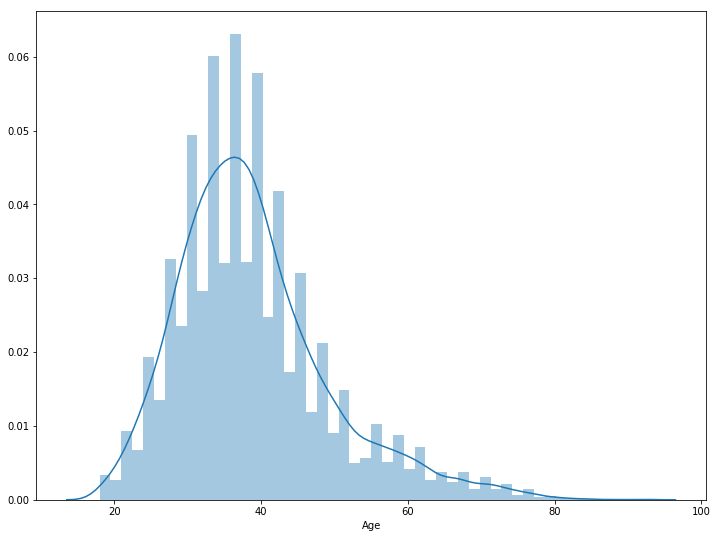

In [33]:
plt.figure(figsize=(12,9))
sns.distplot(df['Age'])

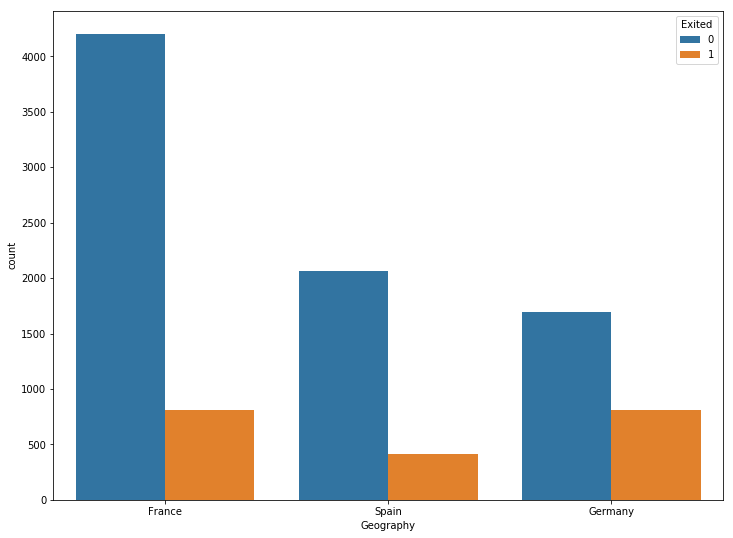

In [34]:
plt.figure(figsize=(12,9))
sns.countplot(x='Geography',hue='Exited',data=df)

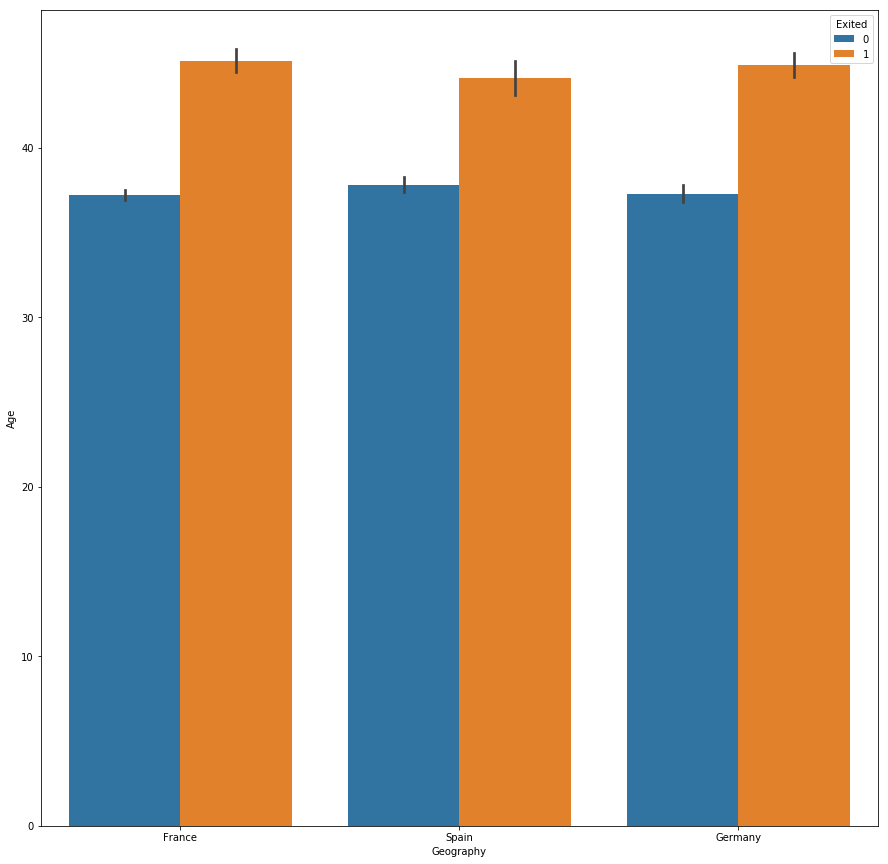

In [35]:
plt.figure(figsize=(15,15))
sns.barplot(x='Geography',y='Age',hue='Exited',data=df)

In [36]:
df['Age'].max()

92

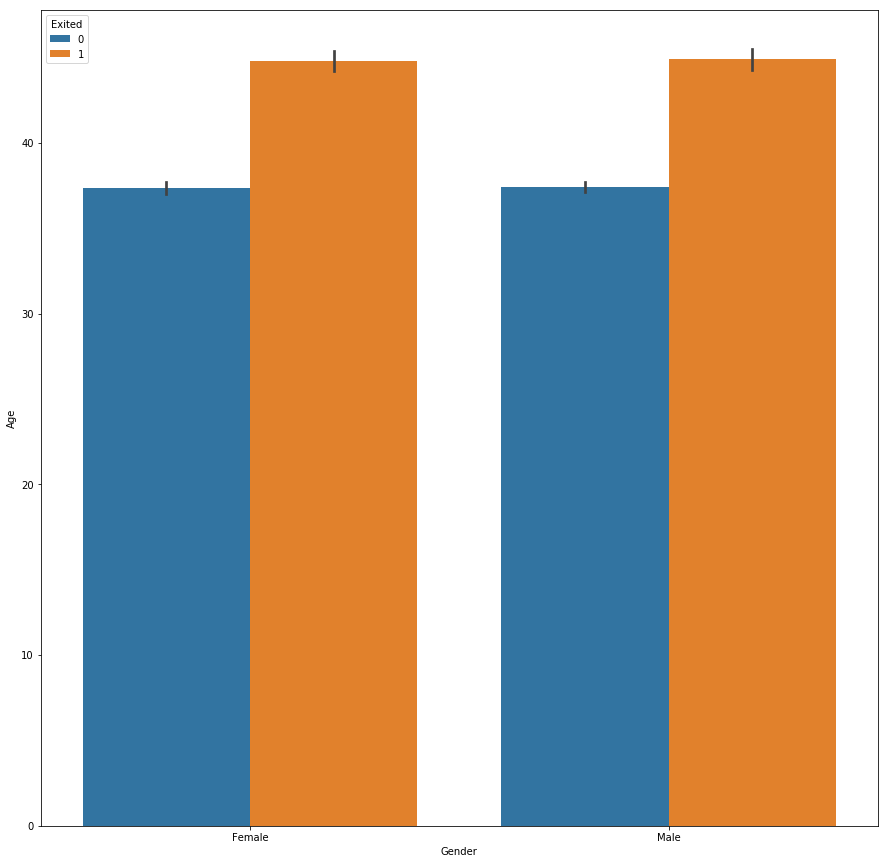

In [37]:
plt.figure(figsize=(15,15))
sns.barplot(x='Gender',y='Age',hue='Exited',data=df)

In [38]:
df['CreditScore'].corr(df['Exited'])

-0.02709353975465779

In [39]:
df['Age'].corr(df['Exited'])

0.28532303783506835

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
y_pred = (y_pred>0.5)

In [42]:
cm = confusion_matrix(y_test,y_pred)

In [43]:
cm

array([[1517,   78],
       [ 203,  202]], dtype=int64)

In [44]:
((1520+209)/2000)

0.8645

In [45]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [46]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
new_prediction = classifier.predict(sc.transform(np.array([[1.0,1,1055,0,40,3,60000,2,1,1,10000000]])))

In [48]:
new_prediction = (new_prediction<0.5)


In [49]:
new_prediction

array([[ True]])

In [51]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [52]:
def build_ANN():
    # Initialising the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

    # Adding the second hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
    
    

In [53]:
classifier = KerasClassifier(build_fn=build_ANN, batch_size = 10, epochs = 100)

In [ ]:
accuracy = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10, n_jobs= -1)